In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

from matplotlib import pyplot as plt
import numpy as np

In [2]:
N=200
mass=5000
L=1
T = (1 / (2 * mass)) * np.square(np.pi/L)*np.diag(np.square(np.arange(N))) 
V = lambda x: 20*np.exp(-np.square((x-0.3)/(0.001)))+np.exp(-np.square((x-0.8)/(0.1)))
S = np.eye(N)
psi = lambda n: lambda x: np.sqrt(2/L)*np.sin(np.pi*(n +  1)*x/L)


In [3]:
def compute_V(N, V, M=1000):
    """
    Computes potential Energy
    
    :param N: number of basisvectors.
    :param V: potential energy lambda.
    :param M: number of äquidistant point for numeric integration.
    """
    W = np.zeros((N,N))
    X = np.linspace(0, L, M)
    test = np.vectorize(V)(X[:-1])
    test = X[:-1][test!=0]
    boundary = (np.min(test), np.max(test))
    X = np.linspace(boundary[0], boundary[1], M)
    V_vec = np.vectorize(V)(X[:-1])
    for i in range(N):
        for j in range(N):
            temp = np.sum(np.vectorize(psi(i))(X[:-1])*np.vectorize(psi(j))(X[:-1])*V_vec*np.diff(X))
            W[i,j] = temp
            W[j,i] = temp
    return W

In [4]:
def init_psi(N, phi, M=1000):
    """
    computes the basis representation of phi.
    :param N: number of basis vectors.
    :param M: number of äquidistant subdivisions for numeric integration.
    :param phi: lambda of the wave function.
    """
    X = np.linspace(0, L, M)
    ls = list()
    for i in range(N):
        ls.append(np.sum(np.vectorize(psi(i))(X[:-1])*np.vectorize(phi)(X[:-1])*np.diff(X)))
    return np.array(ls)

In [5]:
W = compute_V(N, V, 1000)

In [6]:
# Compute the hamiltonian and eingenvalue decomposition of it.
# then compute the unitary group U(t) corresponding to H
H = T + W
D, M = np.linalg.eig(H)
U = lambda t: np.matmul(M, np.matmul(np.diag(np.exp(1j * D * t)), M.T))

In [7]:
# U(t) is in fact unitary.
np.max(np.abs(np.matmul(U(1),np.matrix.getH(U(1)))-np.eye(N)))

8.106848525812893e-13

In [8]:
# discretization of the intervall [0,1]
_X = np.linspace(0, L, 1000)

def show_psi(c, x):
    """
    compute the function phi representation of the wave.
    :param c: psi reprented in the basis (psi_i)i=1:N.
    :param x: position at which to evaluate the wave function.
    """
    return np.sum([c[i] * psi(i)(x) for i in range(N)])

# initial representation of the wave function in basis.
u_0 = init_psi(N, lambda x: np.exp(-np.square((x-0.7)/(0.05))))

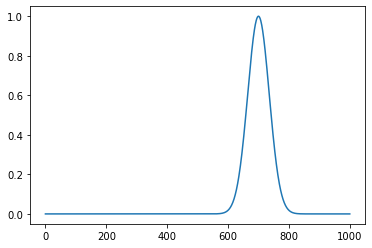

In [9]:
plt.plot(np.vectorize(lambda x: show_psi(u_0, x))(_X))

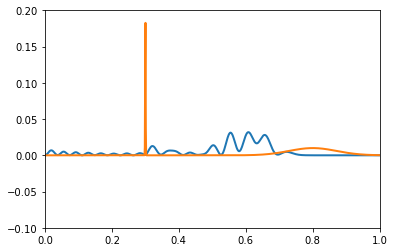

In [10]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1.0))
ax.set_ylim((-0.1, 0.2))

line, = ax.plot([], [], lw=2)
line_, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame

def init():
    line.set_data([], [])
    return (line,)


def animate(i):
    u = np.matmul(U(i*0.5), u_0)
    p = np.vectorize(lambda x: np.square(np.abs(show_psi(u, x))))(_X)
    p = p / np.sum(p)
    line.set_data(_X, 5 * p)
    line_.set_data(_X, np.vectorize(V)(_X) / 100)
    return (line, line_,)

    #expectation_position.append(np.sum(p*_X))
    #modulus.append(np.argmax(p))
    
    #plt.plot(_X, 5 * p)
    #plt.plot(_X, np.vectorize(V)(_X) / 100)
    #plt.show()
    #print(np.matmul(np.matmul(np.matrix.getH(_u),T + W),_u))


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10000, interval=20, blit=True)

HTML(anim.to_html5_video())



plt.plot(np.array(ls)-0.5)

plt.plot(np.array(ss))